In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [45]:
import os
import requests
import zipfile
import os

In [46]:
# def get_dataset():
#     """
#     Creates a folder named 'dataset' if it doesn't exist.
#     :return:
#         None
#     """
#     dest_folder_name = "dataset"
#     dest_csv_name = "phishing_data.csv"
#     csv_link = "https://archive.ics.uci.edu/static/public/967/phiusiil+phishing+url+dataset.zip"

#     dest_folder_path = os.path.join(os.getcwd(), dest_folder_name)
#     dest_file_path = os.path.join(dest_folder_path, dest_csv_name)
#     dest_zip_save_path = os.path.join(dest_folder_name, "dataset.zip")

#     if not os.path.exists(dest_file_path):
#         # Create folder
#         os.makedirs(dest_folder_path)
#         # Download zip file
#         zip_folder = requests.get(csv_link, stream=True)
#         zip_folder.raise_for_status()

#         with open(dest_zip_save_path, "wb") as f:
#             for chunk in zip_folder.iter_content(chunk_size=8192):
#                 f.write(chunk)
#         print(f"Zip file downloaded to: {dest_zip_save_path}")

#         # Extract the zip file
#         with zipfile.ZipFile(dest_zip_save_path, "r") as zip_ref:
#             zip_ref.extractall(dest_folder_path)
#         print(f"Zip file extracted to: {dest_folder_path}")

#         # Rename csv file to csv_name variable
#         old_filepath = os.path.join(
#             dest_folder_path, "PhiUSIIL_Phishing_URL_Dataset.csv"
#         )
#         os.rename(old_filepath, dest_file_path)
#         print(f"File renamed to '{dest_file_path}'")


# get_dataset()

In [47]:
phishing_df = pd.read_csv("dataset/dataset_phishing.csv")
phishing_df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [48]:
phishing_df = phishing_df[["url", "status"]]

In [49]:
phishing_df["status"] = phishing_df["status"].apply(
    lambda x: 0 if x == "legitimate" else 1
)

In [50]:
phishing_df.head()

,url,status
0,http://www.crestonwood.com/router.php,0
1,http://shadetreetechnology.com/V4/validation/a...,1
2,https://support-appleld.com.secureupdate.duila...,1
3,http://rgipt.ac.in,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0


In [51]:
len(phishing_df)

11430

In [52]:
X = phishing_df["url"]
y = phishing_df["status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=42, stratify=y
)

In [53]:
len(X_test)

572

In [55]:
# Prediction
docker_url = "http://127.0.0.1:3000/query_url" 

def is_phishing_link(url):
    data = {"URL": url}
    response = requests.post(docker_url, json=data)

    json_response = response.json()  # Parsing the response as JSON

    return int(json_response["is_phishing_link"])

is_phishing_link("http://googlee.come")

1

In [56]:
prediction_df = pd.DataFrame({
    "url": X_test,
    "label": y_test,
})

prediction_df["prediction"] = prediction_df.apply(
    lambda row: is_phishing_link(row['url']), axis=1
)
prediction_df.head()

,url,label,prediction
4338,https://en.wikipedia.org/wiki/United_Nations_S...,0,0
8137,https://www.cevital.com/,0,1
11111,http://union.gr/components/MIEN/index.html,1,0
3581,http://www.examguides.com/security+/js/read/ed...,1,0
5133,http://betasusgirdi.blogspot.com,1,1


In [57]:
accuracy = (prediction_df["label"] == prediction_df["prediction"]).mean()
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 65.21%


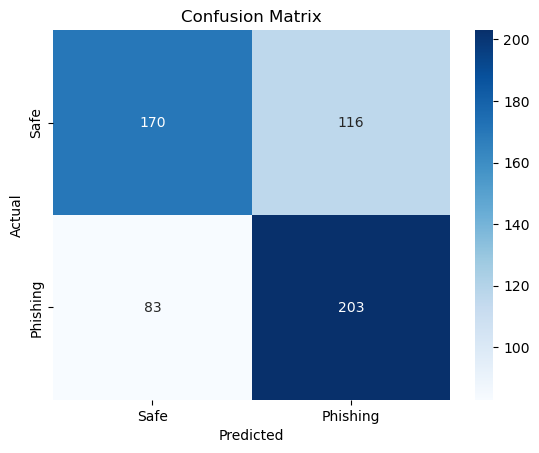

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(prediction_df["label"], prediction_df["prediction"])
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Safe", "Phishing"],
    yticklabels=["Safe", "Phishing"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
prediction_df.to_csv("prediction.csv", index=False)